# Exploratory Data Analysis

Chapter 2

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from distribution import Pmf, Cdf

## Loading and validation

Reading data from the [General Social Survey](https://gssdataexplorer.norc.org/projects/29853)

TODO: Add link to project

In [5]:
tables = pd.read_html('https://www.cdc.gov/brfss/annual_data/2017/llcp_varlayout_17_onecolumn.html')

In [9]:
layout = tables[1]
layout.index = layout['Variable Name']
layout

,Starting Column,Variable Name,Field Length
Variable Name,,,
_STATE,1,_STATE,2
FMONTH,17,FMONTH,2
IDATE,19,IDATE,8
IMONTH,19,IMONTH,2
IDAY,21,IDAY,2
IYEAR,23,IYEAR,4
DISPCODE,32,DISPCODE,4
SEQNO,36,SEQNO,10
_PSU,36,_PSU,10


In [43]:
names = ['SEX', 'INCOME2', 'WTKG3', 'HTM4', '_LLCPWT', '_AGEG5YR']

In [55]:
colspecs = []
for name in names:
    start, _, length = layout.loc[name]
    colspecs.append((start-1, start+length-1))
    
colspecs

[(124, 125),
 (179, 181),
 (2039, 2044),
 (2036, 2039),
 (1797, 1807),
 (2027, 2029)]

In [81]:
filename = 'LLCP2017.ASC.gz'
brfss = pd.read_fwf(filename,
                    colspecs=colspecs, 
                    names=names,
                    compression='gzip',
                    nrows=None)

brfss.head()

,SEX,INCOME2,WTKG3,HTM4,_LLCPWT,_AGEG5YR
0,2,6.0,7348.0,165.0,79.425947,11
1,1,8.0,9571.0,180.0,89.694580,10
2,1,99.0,8845.0,188.0,440.121376,11
3,2,1.0,7711.0,170.0,194.867164,11
4,2,2.0,6350.0,165.0,169.087888,10


In [82]:
brfss.shape

(450016, 6)

In [83]:
brfss['SEX'].value_counts().sort_index()

1    198725
2    251007
9       284
Name: SEX, dtype: int64

In [84]:
brfss['SEX'].replace([9], np.nan, inplace=True)

In [85]:
brfss['INCOME2'].value_counts().sort_index()

1.0      18346
2.0      19334
3.0      27735
4.0      34222
5.0      39751
6.0      53148
7.0      59632
8.0     122763
77.0     33328
99.0     38426
Name: INCOME2, dtype: int64

In [86]:
brfss['INCOME2'].replace([77, 99], np.nan, inplace=True)

In [92]:
brfss['WTKG3'].describe()

count    420145.000000
mean       8158.671851
std        2070.102388
min        2268.000000
25%        6759.000000
50%        7938.000000
75%        9163.000000
max       27500.000000
Name: WTKG3, dtype: float64

In [93]:
brfss['HTM4'].describe()

count    433572.000000
mean        169.821863
std          10.614508
min          91.000000
25%         163.000000
50%         170.000000
75%         178.000000
max         236.000000
Name: HTM4, dtype: float64

In [94]:
brfss['_LLCPWT'].describe()

count    450016.000000
mean        568.098034
std        1119.545360
min           0.131624
25%          91.499675
50%         237.083009
75%         592.876546
max       45053.592700
Name: _LLCPWT, dtype: float64

In [95]:
brfss['_AGEG5YR'].describe()

count    450016.000000
mean          7.747962
std           3.557474
min           1.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          14.000000
Name: _AGEG5YR, dtype: float64

In [96]:
brfss['_AGEG5YR'].replace([14], np.nan, inplace=True)

In [149]:
lower = np.arange(15, 85, 5)
upper = lower + 4

In [150]:
lower[1]= 18
lower = pd.Series(lower, index=range(len(lower)))
lower

0     15
1     18
2     25
3     30
4     35
5     40
6     45
7     50
8     55
9     60
10    65
11    70
12    75
13    80
dtype: int64

In [151]:
upper[-1] = 99
upper = pd.Series(upper, index=range(len(upper)))
upper

0     19
1     24
2     29
3     34
4     39
5     44
6     49
7     54
8     59
9     64
10    69
11    74
12    79
13    99
dtype: int64

In [152]:
age_code = brfss['_AGEG5YR']

In [153]:
lower = lower[age_code]
lower.describe()

count    443915.000000
mean         53.191994
std          17.754445
min          18.000000
25%          40.000000
50%          55.000000
75%          65.000000
max          80.000000
dtype: float64

In [154]:
upper = upper[age_code]
upper.describe()

count    443915.000000
mean         58.520854
std          19.708977
min          24.000000
25%          44.000000
50%          59.000000
75%          69.000000
max          99.000000
dtype: float64

In [157]:
def randint(lower, upper):
    for low, high in zip(lower, upper+1):
        try:
            yield np.random.randint(low, high)
        except ValueError:
            yield np.nan

In [158]:
brfss['AGE'] = list(randint(lower, upper))

In [159]:
brfss['AGE'].describe()

count    443915.000000
mean         55.857849
std          18.774884
min          18.000000
25%          42.000000
50%          58.000000
75%          69.000000
max          99.000000
Name: age, dtype: float64

In [160]:
sample = utils.resample_rows_weighted(brfss, '_LLCPWT')[:100000]

In [163]:
sample.to_hdf('brfss.hdf5', 'brfss')

In [164]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.92 ms


In [165]:
brfss.shape

(100000, 7)

In [166]:
brfss.describe()

,SEX,INCOME2,WTKG3,HTM4,_LLCPWT,_AGEG5YR,age
count,99938.000000,83356.000000,93438.000000,95195.000000,100000.000000,98816.000000,98816.000000
mean,1.511617,5.792840,8119.824119,170.217501,2779.550579,6.099893,47.707254
std,0.499868,2.228355,2087.694402,10.834020,3983.603004,3.588736,18.928562
min,1.000000,1.000000,2268.000000,91.000000,4.218451,1.000000,18.000000
25%,1.000000,4.000000,6577.000000,163.000000,576.673886,3.000000,32.000000
50%,2.000000,6.000000,7893.000000,170.000000,1383.001815,6.000000,47.000000
75%,2.000000,8.000000,9072.000000,178.000000,3195.533502,9.000000,62.000000
max,2.000000,8.000000,27216.000000,226.000000,45053.592700,13.000000,99.000000


In [55]:
def numnull(series):
    return sum(series.isnull())

In [56]:
replace_invalid(gss)

In [57]:
sample = utils.resample_by_year(gss)
sample.shape

(62466, 97)

In [33]:
tables = pd.read_html('https://gssdataexplorer.norc.org/projects/52787/variables/53/vshow')

In [34]:
len(tables)

4

In [35]:
tables[0]

,0,1,2
0,ballot,Ballot used for interview,NaN
1,id,Respondent id number,NaN
2,year,Gss year for this respondent,NaN


In [36]:
tables[1]

,0,1
0,Code,Label
1,18,NaN
2,19,NaN
3,20,NaN
4,21,NaN
5,22,NaN
6,23,NaN
7,24,NaN
8,25,NaN
9,26,NaN


In [37]:
tables[2]

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1972,1973,1974,1975,1976,1977,1978,1980,1982,1983,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
1,5,6,10,10,8,3,7,2,6,10,...,6,7,4,27,19,6,10,12,6,7
2,24,29,21,38,34,26,25,28,33,23,...,36,44,25,33,47,31,24,20,25,33
3,34,29,25,33,32,38,28,26,25,12,...,36,40,32,32,50,28,24,19,26,26
4,37,32,33,26,28,25,32,31,40,21,...,48,37,40,38,52,21,35,31,24,33
5,38,42,29,31,26,36,29,38,35,28,...,37,39,46,36,72,27,19,31,28,44
6,31,33,50,35,34,36,42,30,45,34,...,42,48,68,47,63,37,38,30,30,49
7,31,43,34,42,41,28,41,39,41,36,...,37,52,58,50,61,34,31,27,31,35
8,40,32,28,46,35,34,40,22,57,45,...,50,53,61,55,74,26,48,31,48,56
9,48,33,41,36,30,48,51,27,47,56,...,61,58,54,59,83,41,29,29,47,42


In [38]:
tables[3]

,0,1
0,Valid cases,62245
1,Missing cases,221


### Age 

https://gssdataexplorer.norc.org/projects/29853/variables/53/vshow

In [15]:
numnull(gss.age)

221

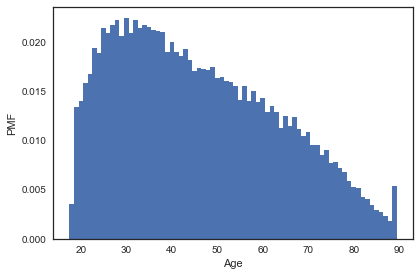

In [16]:
pmf = Pmf.from_seq(gss.age)
pmf.bar(width=1)
decorate(xlabel='Age', ylabel='PMF')

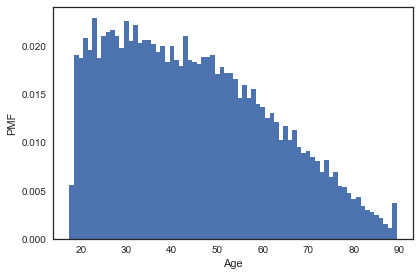

In [17]:
pmf = Pmf.from_seq(sample.age)
pmf.bar(width=1)
decorate(xlabel='Age', ylabel='PMF')

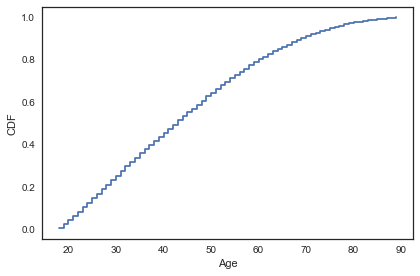

In [18]:
cdf = Cdf.from_seq(sample.age)
cdf.step()
decorate(xlabel='Age', ylabel='CDF')

In [19]:
cdf(51)

array(0.65957481)

In [20]:
cdf.inverse(0.5)

array(43.)

In [21]:
stop

NameError: name 'stop' is not defined

### Year of birth 

https://gssdataexplorer.norc.org/projects/29853/variables/5507/vshow

In [22]:
numnull(gss.cohort)

221

In [23]:
thinkplot.Cdf(thinkstats2.Cdf(gss.cohort))
thinkplot.Config(xlabel='Year of birth', ylabel='CDF')

NameError: name 'thinkplot' is not defined

### Sex 

https://gssdataexplorer.norc.org/projects/41723/variables/81/vshow

In [ ]:
numnull(gss.sex)

In [ ]:
utils.values(gss, 'sex')

### Race

https://gssdataexplorer.norc.org/projects/41723/variables/82/vshow

CODE WITHOUT ASKING ONLY IF THERE IS NO DOUBT IN YOUR MIND. 
What race do you consider yourself? RECORD VERBATIM AND CODE.

In [ ]:
numnull(gss.race)

In [ ]:
utils.values(gss, 'race')

### Hispanic 



In [ ]:
numnull(gss.hispanic)

In [ ]:
utils.values(gss, 'hispanic')

### srcbelt

C. SRC (SURVEY RESEARCH CENTER, UNIVERSITY OF MICHIGAN) NEW BELT CODE

https://gssdataexplorer.norc.org/projects/41723/variables/121/vshow

In [ ]:
numnull(gss.srcbelt)

In [ ]:
utils.values(gss, 'srcbelt')

### Make age and cohort groups

Group people into 5- and 10-year bins by birth year.

In [ ]:
gss['cohort5'] = utils.RoundIntoBins(gss, 'cohort', 5, low=2) + 2.5

In [ ]:
grouped_cohort = gss.groupby(['cohort5'])
counts = grouped_cohort.gunlaw.count()           # count cases where we have the dependent var
counts

To avoid a final data point with a small sample size, I chose `low` to minimize the number of people in the last group, and I've lumped them in with the previous group.

In [ ]:
gss.loc[gss.cohort5==1999.5, 'cohort5'] = 1994.5
gss.loc[gss.cohort5<1894, 'cohort5'] = 1894.5

In [ ]:
grouped_cohort = gss.groupby(['cohort5'])
counts = grouped_cohort.gunlaw.count()
counts

In [ ]:
gss['cohort10'] = utils.RoundIntoBins(gss, 'cohort', 10)

In [ ]:
grouped_cohort = gss.groupby(['cohort10'])
counts = grouped_cohort.gunlaw.count()
counts

Here's the number of respondents in each year.

In [ ]:
utils.values(gss, 'year')

Group into 4 year intervals, chosen to get 2014 and 2016 into the last bin.

In [ ]:
gss['year4'] = utils.RoundIntoBins(gss, 'year', 4, low=1970) + 1
utils.values(gss, 'year4')

Group people into 5 and 3-year age groups.

In [ ]:
gss['age5'] = utils.RoundIntoBins(gss, 'age', 5) + 2.5
utils.values(gss, 'age5')

In [ ]:
gss['age3'] = utils.RoundIntoBins(gss, 'age', 3, low=0) + 1.5
utils.values(gss, 'age3')

### Make booleans

In [ ]:
def copy_nan(df, varname, newvar):
    df.loc[df[varname].isnull(), newvar] = np.nan

In [ ]:
def make_boolean(df, varname, values, newvar):
    """Make a boolean variable.
    
    df: DataFrame
    varname: name of base variable
    values: sequence of values for varname
    newvar: name of new variable (recode)
    """
    #assert numnull(df[varname]) == 0
    df[newvar] = df[varname].isin(values)
    copy_nan(df, varname, newvar)

In [ ]:
def make_booleans(df):
    df['cohort10'] = utils.RoundIntoBins(df, 'cohort', 10)
    make_boolean(df, 'cohort10', [1920], 'twenties')
    make_boolean(df, 'cohort10', [1930], 'thirties')
    make_boolean(df, 'cohort10', [1940], 'forties')
    make_boolean(df, 'cohort10', [1950], 'fifties')
    make_boolean(df, 'cohort10', [1960], 'sixties')
    make_boolean(df, 'cohort10', [1970], 'seventies')
    make_boolean(df, 'cohort10', [1980], 'eighties')
    make_boolean(df, 'cohort10', [1990], 'nineties')
    make_boolean(df, 'gunlaw', [1.0], 'favor')
    make_boolean(df, 'owngun', [1.0], 'gunhome')
    make_boolean(df, 'gun', [1.0], 'threatened')
    make_boolean(df, 'natcrime', [1.0], 'spendcrime')
    make_boolean(df, 'income', [12], 'topincome')
    make_boolean(df, 'income', [1,2,3,4,5,6,7,8], 'lowincome')
    make_boolean(df, 'polviews', [1,2,3], 'liberal')
    make_boolean(df, 'polviews', [4], 'moderate')
    make_boolean(df, 'polviews', [6,7,8], 'conservative')
    make_boolean(df, 'sex', [2], 'female')
    make_boolean(df, 'hispanic', [2], 'ishisp')
    make_boolean(df, 'race', [2], 'black')
    make_boolean(df, 'race', [3], 'otherrace')
    make_boolean(df, 'srcbelt', [1,2,5], 'urban')
    make_boolean(df, 'srcbelt', [3,4], 'suburban')
    make_boolean(df, 'srcbelt', [6], 'rural')

    df['college'] = df['educ'] >= 13 
    copy_nan(df, 'educ', 'college')
    
    per25 = df['realinc'].quantile(0.25)
    df['lowrealinc'] = df['realinc'] <= per25 
    copy_nan(df, 'realinc', 'lowrealinc')

    per75 = df['realinc'].quantile(0.75)
    df['highrealinc'] = df['realinc'] >= per75 
    copy_nan(df, 'realinc', 'highrealinc')

make_booleans(gss)

### Resample

In [ ]:
sample = utils.ResampleByYear(gss).copy()
sample.shape